In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/ml dataset/Hotel Reservations.csv')

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


**Problem:**
Many people book hotels online these days, but a lot of reservations get canceled or guests don’t show up. This happens for various reasons, like a change in plans or scheduling issues. Since many hotels allow free or low-cost cancellations, customers find it convenient, but for hotels, it can be a problem because empty rooms mean lost revenue.

The challenge is to predict whether a customer will actually stay at the hotel or cancel their booking. If we can make accurate predictions, hotels can manage their bookings better and reduce losses

In [ ]:
df.shape

(36275, 19)

In [ ]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


**Information about the data:**

In the given dataset there are 36,275 records and 19 features. It is a classification task and dependent variable is booking_status and all the remaining features are independent which helps in predicting the booking_status.

**Description of features:**


* **Booking_ID** : unique identifier of each booking
* **no_of_adults** : Number of adults
* **no_of_children** : Number of Children
* **no_of_weekend_nights** : Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* **no_of_week_nights** : Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* **type_of_meal_plan** : Type of meal plan booked by the customer:
* **required_car_parking_space** : Does the customer require a car parking space? (0 - No, 1- Yes)
* **room_type_reserved** : Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
* **lead_time** : Number of days between the date of booking and the arrival date
* **arrival_year** : Year of arrival date
* **arrival_month** : Month of arrival date
* **arrival_date** : Date of the month
* **market_segment_type** : Market segment designation.
* **repeated_guest** : Is the customer a repeated guest? (0 - No, 1- Yes)
* **no_of_previous_cancellations** : Number of previous bookings that were canceled by the customer prior to the current booking
* **no_of_previous_bookings_not_canceled** : Number of previous bookings not canceled by the customer prior to the current booking
* **avg_price_per_room** : Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* **no_of_special_requests** : Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* **booking_status** : Flag indicating if the booking was canceled or not.



In [ ]:
## check for null values
## There are no null values in the given dataset
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [ ]:
## checking for duplicate values
## There are no duplicate values in the given dataset
df.duplicated().sum()

0

In [ ]:
df.dtypes

,0
Booking_ID,object
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,object
required_car_parking_space,int64
room_type_reserved,object
lead_time,int64
arrival_year,int64


**UNIVARIATE ANALYSIS**

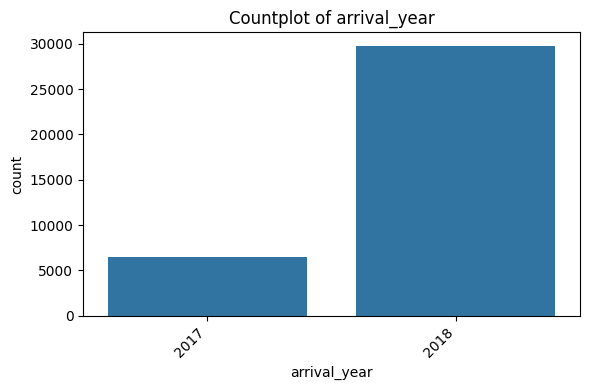

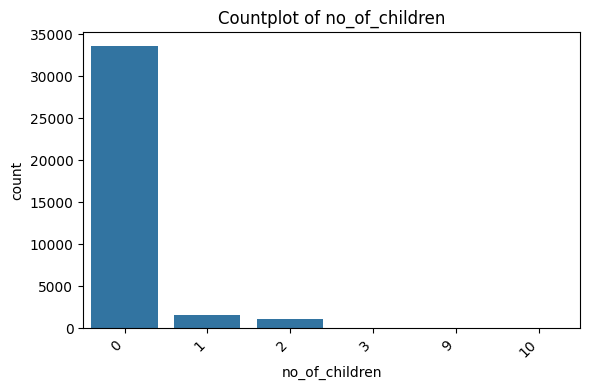

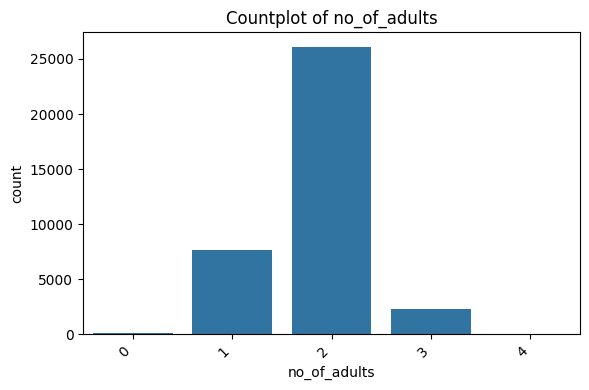

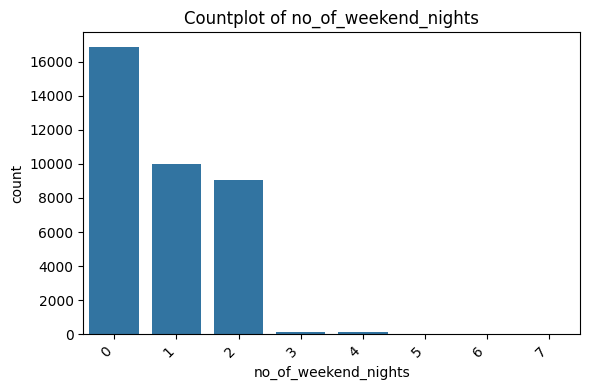

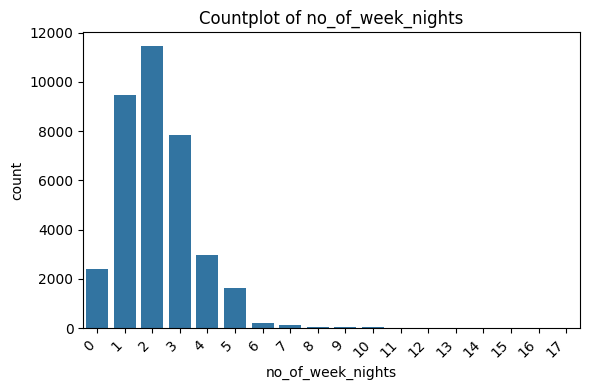

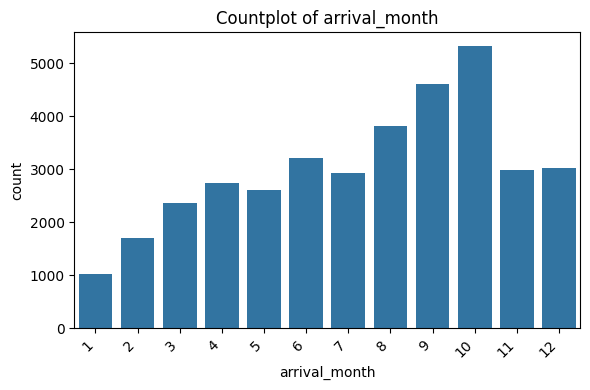

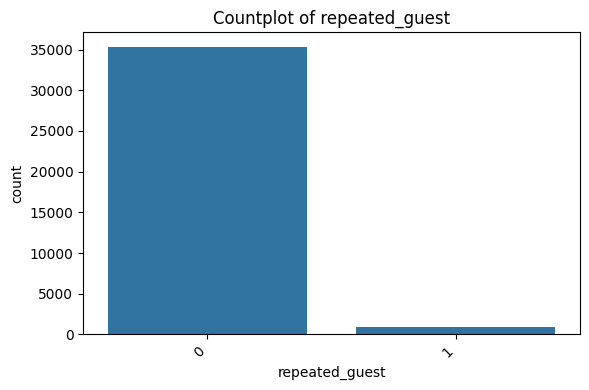

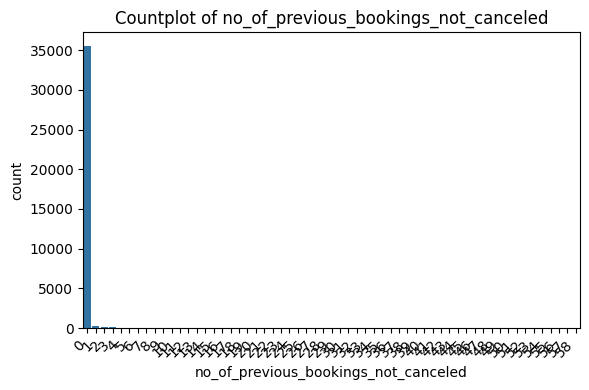

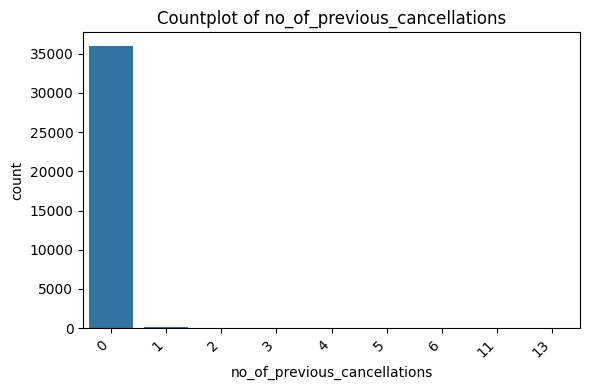

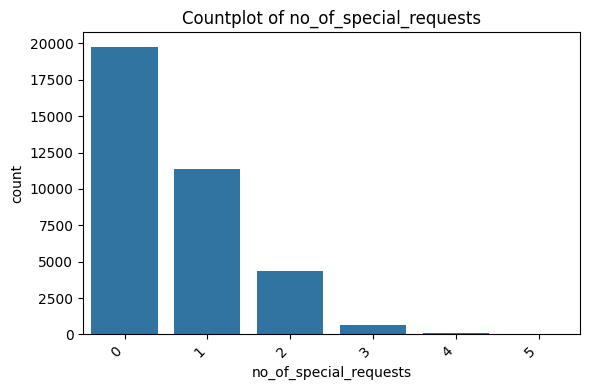

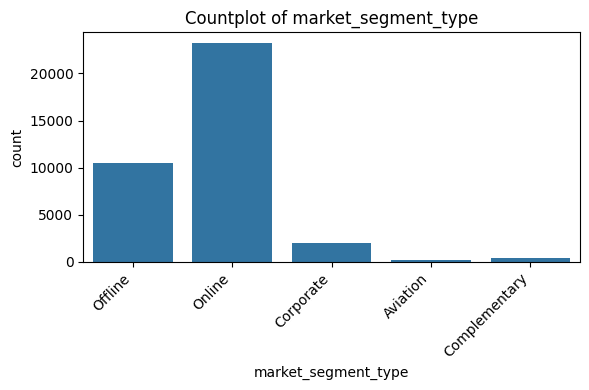

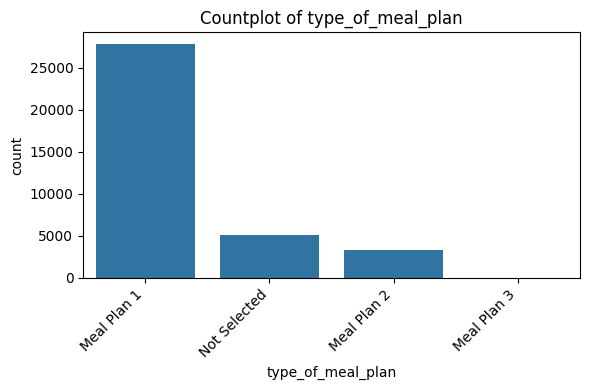

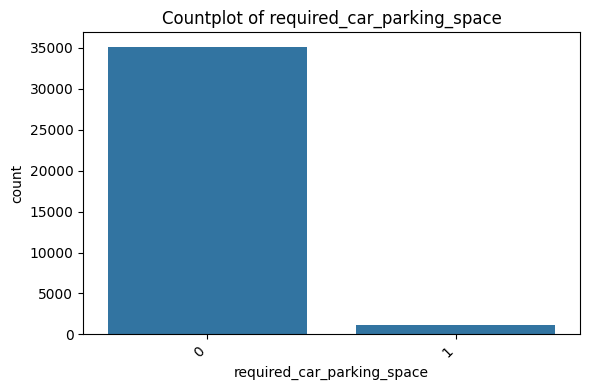

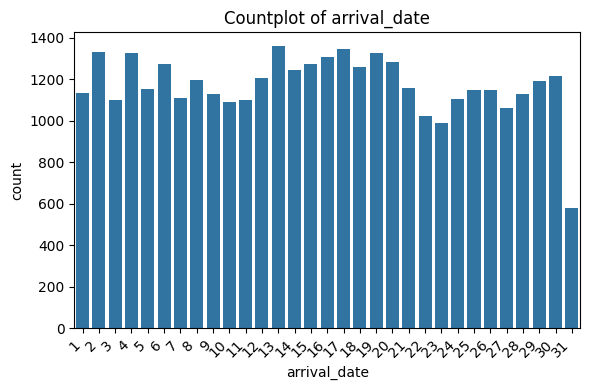

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cols = ['arrival_year', 'no_of_children', 'no_of_adults', 'no_of_weekend_nights',
        'no_of_week_nights', 'arrival_month', 'repeated_guest',
        'no_of_previous_bookings_not_canceled', 'no_of_previous_cancellations',
        'no_of_special_requests', 'market_segment_type', 'type_of_meal_plan',
        'required_car_parking_space', 'arrival_date']

# Loop through each column and create a countplot
for col in cols:
    plt.figure(figsize=(6, 4))  # Adjust figure size if needed
    sns.countplot(data=df, x=col)
    plt.title(f'Countplot of {col}')  # Set title for the plot
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
    plt.tight_layout()
    plt.show()

**observation:** most of the people people booked hotels in 2018 and most of them are newly wed couples and most of them are comimg from the august

**Checking for outliers**

In [ ]:
def show_outliers(dataset, numerical_cols = [], display_outlier = None):
    if(not numerical_cols):
#         numerical_cols = [each_col for each_col in dataset.columns if (dataset[each_col].dtype.name != "object")]
          numerical_cols = dataset.select_dtypes(include = ["int","float"])
    num_cols_to_plot = len(numerical_cols.columns)  # Get the number of numerical columns
    num_rows = int(np.ceil(num_cols_to_plot / 3))  # Adjust to 3 columns per row
    num_cols = min(num_cols_to_plot, 3)
    for each_col in numerical_cols:
        q1 = dataset[each_col].quantile(0.25)
        q3 = dataset[each_col].quantile(0.75)
        iqr = q3 - q1
        l_b = q1 - (1.5 * iqr)
        u_b = q3 + (1.5 * iqr)
        outliers = dataset[(dataset[each_col] < l_b) | (dataset[each_col] > u_b)]

        print("==================",each_col,"=====================")
        print()
        print("Percentage of outliers",(len(outliers)/len(dataset)) * 100)
        print("Total",len(outliers))
        if(display_outlier):
            display(outliers)
    if(display_outlier):
        plt.figure(figsize=(10,7),layout='constrained')
        for idx,each_col in enumerate(numerical_cols , 1):
            if (dataset[each_col].dtype.name != "object"):
                plt.subplot(num_rows,num_cols,idx)
                sns.boxplot(x = dataset[each_col])

================== no_of_adults =====================

Percentage of outliers 28.027567195037907
Total 10167


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
8,INN00009,3,0,0,4,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0,0,96.90,1,Not_Canceled
10,INN00011,1,0,1,0,Not Selected,0,Room_Type 1,0,2018,9,11,Online,0,0,0,85.03,0,Not_Canceled
11,INN00012,1,0,2,1,Meal Plan 1,0,Room_Type 4,35,2018,4,30,Online,0,0,0,140.40,1,Not_Canceled
13,INN00014,1,0,2,0,Meal Plan 1,0,Room_Type 1,95,2018,11,20,Online,0,0,0,90.00,2,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36260,INN36261,3,0,1,4,Meal Plan 1,1,Room_Type 4,178,2018,8,1,Online,0,0,0,137.25,1,Canceled
36261,INN36262,1,0,2,4,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0,0,110.00,0,Canceled
36263,INN36264,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Online,0,0,0,1.00,0,Not_Canceled
36268,INN36269,1,0,0,3,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0,0,110.00,0,Canceled


================== no_of_children =====================

Percentage of outliers 7.437629221226741
Total 2698


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
32,INN00033,0,2,0,3,Meal Plan 1,0,Room_Type 2,56,2018,12,7,Online,0,0,0,82.44,1,Not_Canceled
60,INN00061,2,2,0,1,Meal Plan 1,1,Room_Type 6,2,2018,9,2,Online,0,0,0,258.00,1,Not_Canceled
80,INN00081,2,2,0,2,Meal Plan 1,0,Room_Type 6,83,2018,4,1,Online,0,0,0,159.30,0,Canceled
95,INN00096,2,1,0,2,Meal Plan 1,1,Room_Type 1,134,2018,8,4,Online,0,0,0,130.50,2,Not_Canceled
99,INN00100,2,2,1,3,Meal Plan 1,0,Room_Type 6,30,2018,12,22,Online,0,0,0,156.90,0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36221,INN36222,2,2,2,4,Meal Plan 1,0,Room_Type 6,62,2018,9,24,Online,0,0,0,207.90,1,Not_Canceled
36227,INN36228,2,2,0,1,Meal Plan 1,0,Room_Type 6,20,2018,8,6,Online,0,0,0,231.00,1,Not_Canceled
36231,INN36232,2,1,0,2,Meal Plan 1,0,Room_Type 1,1,2018,6,28,Online,0,0,0,167.00,1,Not_Canceled
36249,INN36250,2,2,0,3,Meal Plan 1,0,Room_Type 6,65,2018,7,27,Online,0,0,0,177.30,0,Canceled


================== no_of_weekend_nights =====================

Percentage of outliers 0.057891109579600274
Total 21


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
539,INN00540,1,0,6,15,Meal Plan 1,0,Room_Type 4,12,2018,3,30,Online,0,0,0,128.06,0,Canceled
1588,INN01589,1,0,6,13,Meal Plan 1,0,Room_Type 1,5,2017,10,4,Corporate,0,0,0,95.00,1,Canceled
2296,INN02297,1,0,6,14,Meal Plan 1,0,Room_Type 1,17,2018,11,20,Online,0,0,0,97.20,0,Canceled
2710,INN02711,2,0,6,13,Not Selected,0,Room_Type 1,64,2018,3,10,Online,0,0,0,70.46,0,Canceled
6929,INN06930,2,0,6,15,Not Selected,0,Room_Type 1,17,2018,12,2,Online,0,0,0,75.66,0,Not_Canceled
7160,INN07161,2,0,6,14,Meal Plan 1,0,Room_Type 1,6,2018,1,10,Online,0,0,0,87.70,1,Not_Canceled
8528,INN08529,2,0,6,14,Not Selected,0,Room_Type 1,11,2018,11,18,Online,0,0,0,75.86,0,Canceled
14275,INN14276,1,0,6,14,Meal Plan 1,0,Room_Type 1,29,2018,2,5,Online,0,0,0,70.91,0,Canceled
16977,INN16978,1,0,6,17,Meal Plan 1,0,Room_Type 1,9,2018,1,28,Online,0,0,0,68.23,1,Not_Canceled
17938,INN17939,1,0,6,15,Meal Plan 1,0,Room_Type 1,8,2018,4,13,Corporate,0,0,0,130.00,0,Canceled


================== no_of_week_nights =====================

Percentage of outliers 0.8931771192281186
Total 324


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
194,INN00195,2,0,4,10,Meal Plan 1,0,Room_Type 4,147,2018,8,3,Online,0,0,0,118.88,1,Canceled
380,INN00381,2,0,4,11,Meal Plan 1,0,Room_Type 4,237,2018,9,13,Online,0,0,0,116.62,1,Canceled
477,INN00478,2,0,3,7,Not Selected,0,Room_Type 1,217,2018,12,5,Online,0,0,0,46.63,1,Not_Canceled
539,INN00540,1,0,6,15,Meal Plan 1,0,Room_Type 4,12,2018,3,30,Online,0,0,0,128.06,0,Canceled
554,INN00555,1,2,4,9,Meal Plan 1,0,Room_Type 6,30,2018,11,2,Online,0,0,0,186.22,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35784,INN35785,2,0,4,8,Meal Plan 1,0,Room_Type 4,5,2018,2,12,Online,0,0,0,106.83,0,Canceled
35904,INN35905,2,2,4,10,Meal Plan 1,0,Room_Type 6,43,2018,3,25,Online,0,0,0,170.61,0,Canceled
36130,INN36131,2,0,2,7,Meal Plan 1,0,Room_Type 1,117,2018,12,20,Online,0,0,0,90.40,1,Not_Canceled
36163,INN36164,1,0,6,13,Meal Plan 1,0,Room_Type 4,102,2018,5,15,Online,0,0,0,132.60,1,Canceled


================== required_car_parking_space =====================

Percentage of outliers 3.09855272226051
Total 1124


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
35,INN00036,2,0,0,1,Not Selected,1,Room_Type 1,23,2018,4,27,Online,0,0,0,115.00,1,Not_Canceled
60,INN00061,2,2,0,1,Meal Plan 1,1,Room_Type 6,2,2018,9,2,Online,0,0,0,258.00,1,Not_Canceled
72,INN00073,2,0,1,1,Meal Plan 1,1,Room_Type 1,30,2018,8,29,Online,0,0,0,122.85,1,Not_Canceled
84,INN00085,2,0,1,2,Meal Plan 1,1,Room_Type 4,46,2018,3,4,Online,0,0,0,98.30,1,Not_Canceled
91,INN00092,2,0,1,2,Meal Plan 1,1,Room_Type 1,68,2018,3,18,Online,0,0,0,105.30,0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36100,INN36101,2,0,0,2,Meal Plan 1,1,Room_Type 1,217,2018,5,24,Online,0,0,0,124.20,1,Canceled
36134,INN36135,2,0,1,1,Meal Plan 1,1,Room_Type 2,42,2017,12,28,Online,0,0,0,100.50,0,Not_Canceled
36177,INN36178,2,0,2,3,Meal Plan 1,1,Room_Type 1,55,2018,11,24,Online,0,0,0,68.07,1,Not_Canceled
36210,INN36211,3,0,1,2,Meal Plan 1,1,Room_Type 4,87,2018,8,8,Online,0,0,0,159.30,1,Not_Canceled


================== lead_time =====================

Percentage of outliers 3.669193659545141
Total 1331


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
5,INN00006,2,0,0,2,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0,0,115.0,1,Canceled
96,INN00097,2,0,0,2,Meal Plan 2,0,Room_Type 1,320,2018,8,18,Online,0,0,0,115.0,1,Canceled
118,INN00119,2,0,0,1,Meal Plan 1,0,Room_Type 1,443,2018,4,29,Online,0,0,0,65.0,0,Canceled
120,INN00121,2,0,0,3,Meal Plan 1,0,Room_Type 1,317,2018,9,1,Online,0,0,0,106.2,1,Canceled
170,INN00171,2,0,0,2,Meal Plan 1,0,Room_Type 1,317,2018,9,15,Online,0,0,0,120.0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36139,INN36140,2,0,1,2,Meal Plan 1,0,Room_Type 1,305,2018,11,4,Offline,0,0,0,89.0,0,Canceled
36171,INN36172,2,0,1,2,Meal Plan 2,0,Room_Type 1,315,2018,9,30,Offline,0,0,0,160.0,0,Canceled
36178,INN36179,2,0,2,0,Meal Plan 2,0,Room_Type 1,386,2018,10,23,Offline,0,0,0,115.0,1,Canceled
36191,INN36192,2,0,0,3,Meal Plan 1,0,Room_Type 1,304,2018,11,3,Offline,0,0,0,89.0,0,Canceled


================== arrival_year =====================

Percentage of outliers 17.957270847691248
Total 6514


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
6,INN00007,2,0,1,3,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0,0,107.55,1,Not_Canceled
14,INN00015,2,0,0,2,Meal Plan 1,0,Room_Type 1,47,2017,10,20,Online,0,0,0,94.50,2,Not_Canceled
16,INN00017,1,0,1,0,Meal Plan 1,0,Room_Type 1,0,2017,10,5,Offline,0,0,0,96.00,0,Not_Canceled
17,INN00018,2,0,1,3,Not Selected,0,Room_Type 1,1,2017,8,10,Online,0,0,0,96.00,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36229,INN36230,3,0,0,3,Meal Plan 1,0,Room_Type 1,42,2017,11,25,Online,0,0,0,106.80,1,Not_Canceled
36235,INN36236,1,0,1,0,Meal Plan 1,0,Room_Type 1,3,2017,9,21,Offline,0,0,0,77.00,0,Not_Canceled
36242,INN36243,1,0,2,4,Meal Plan 1,0,Room_Type 1,63,2017,9,24,Offline,0,0,0,118.43,0,Not_Canceled
36250,INN36251,1,0,0,2,Meal Plan 2,0,Room_Type 1,6,2017,12,10,Online,0,0,0,0.00,0,Not_Canceled


================== arrival_month =====================

Percentage of outliers 0.0
Total 0


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


================== arrival_date =====================

Percentage of outliers 0.0
Total 0


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


================== repeated_guest =====================

Percentage of outliers 2.563749138525155
Total 930


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
88,INN00089,2,0,0,1,Not Selected,0,Room_Type 1,17,2018,12,10,Online,1,0,5,95.0,0,Not_Canceled
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
155,INN00156,1,0,0,3,Meal Plan 1,0,Room_Type 1,4,2018,11,1,Corporate,1,1,5,65.0,1,Not_Canceled
266,INN00267,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
288,INN00289,2,0,0,1,Meal Plan 1,0,Room_Type 2,9,2018,9,7,Complementary,1,0,3,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35999,INN36000,1,0,1,1,Meal Plan 1,1,Room_Type 1,3,2018,6,20,Corporate,1,0,8,67.0,1,Not_Canceled
36029,INN36030,1,0,0,3,Meal Plan 1,1,Room_Type 1,5,2018,9,27,Corporate,1,0,3,67.0,1,Not_Canceled
36079,INN36080,1,0,0,1,Not Selected,1,Room_Type 1,0,2018,1,7,Online,1,11,0,77.5,0,Not_Canceled
36080,INN36081,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled


================== no_of_previous_cancellations =====================

Percentage of outliers 0.9317711922811854
Total 338


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
155,INN00156,1,0,0,3,Meal Plan 1,0,Room_Type 1,4,2018,11,1,Corporate,1,1,5,65.0,1,Not_Canceled
302,INN00303,2,0,2,1,Meal Plan 1,0,Room_Type 1,68,2018,1,2,Offline,1,1,0,63.0,1,Not_Canceled
328,INN00329,2,0,0,3,Meal Plan 1,0,Room_Type 1,19,2017,10,6,Offline,1,1,0,90.0,0,Not_Canceled
392,INN00393,1,0,0,1,Meal Plan 1,1,Room_Type 1,18,2018,10,18,Corporate,1,3,19,67.0,0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35521,INN35522,1,0,0,1,Meal Plan 1,1,Room_Type 1,1,2018,3,9,Corporate,1,1,3,67.0,1,Not_Canceled
35716,INN35717,1,0,1,2,Meal Plan 1,0,Room_Type 1,0,2018,2,15,Corporate,1,2,20,65.0,1,Not_Canceled
35983,INN35984,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
36079,INN36080,1,0,0,1,Not Selected,1,Room_Type 1,0,2018,1,7,Online,1,11,0,77.5,0,Not_Canceled


================== no_of_previous_bookings_not_canceled =====================

Percentage of outliers 2.238456237077877
Total 812


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
88,INN00089,2,0,0,1,Not Selected,0,Room_Type 1,17,2018,12,10,Online,1,0,5,95.0,0,Not_Canceled
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.0,1,Not_Canceled
155,INN00156,1,0,0,3,Meal Plan 1,0,Room_Type 1,4,2018,11,1,Corporate,1,1,5,65.0,1,Not_Canceled
266,INN00267,1,0,0,2,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0,1,0.0,1,Not_Canceled
288,INN00289,2,0,0,1,Meal Plan 1,0,Room_Type 2,9,2018,9,7,Complementary,1,0,3,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,INN35984,1,0,0,1,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,4,17,0.0,1,Not_Canceled
35999,INN36000,1,0,1,1,Meal Plan 1,1,Room_Type 1,3,2018,6,20,Corporate,1,0,8,67.0,1,Not_Canceled
36029,INN36030,1,0,0,3,Meal Plan 1,1,Room_Type 1,5,2018,9,27,Corporate,1,0,3,67.0,1,Not_Canceled
36080,INN36081,1,0,1,1,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,3,15,0.0,1,Not_Canceled


================== avg_price_per_room =====================

Percentage of outliers 4.6753962784286704
Total 1696


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
60,INN00061,2,2,0,1,Meal Plan 1,1,Room_Type 6,2,2018,9,2,Online,0,0,0,258.00,1,Not_Canceled
63,INN00064,1,0,0,1,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0,0,0.00,1,Not_Canceled
114,INN00115,2,2,2,2,Meal Plan 1,0,Room_Type 2,116,2018,6,26,Online,0,0,0,184.24,1,Canceled
127,INN00128,2,2,0,2,Meal Plan 1,0,Room_Type 6,110,2018,10,14,Online,0,0,0,190.80,0,Canceled
145,INN00146,1,0,0,2,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,3,5,0.00,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36221,INN36222,2,2,2,4,Meal Plan 1,0,Room_Type 6,62,2018,9,24,Online,0,0,0,207.90,1,Not_Canceled
36227,INN36228,2,2,0,1,Meal Plan 1,0,Room_Type 6,20,2018,8,6,Online,0,0,0,231.00,1,Not_Canceled
36250,INN36251,1,0,0,2,Meal Plan 2,0,Room_Type 1,6,2017,12,10,Online,0,0,0,0.00,0,Not_Canceled
36263,INN36264,1,0,2,1,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Online,0,0,0,1.00,0,Not_Canceled


================== no_of_special_requests =====================

Percentage of outliers 2.0978635423845624
Total 761


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
9,INN00010,2,0,0,5,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0,0,133.44,3,Not_Canceled
109,INN00110,2,0,2,1,Meal Plan 1,0,Room_Type 1,32,2017,9,5,Online,0,0,0,94.50,3,Not_Canceled
117,INN00118,2,1,2,5,Meal Plan 1,0,Room_Type 1,105,2018,11,12,Online,0,0,0,102.83,3,Not_Canceled
260,INN00261,3,0,1,1,Meal Plan 1,0,Room_Type 4,1,2018,6,11,Online,0,0,0,166.00,3,Not_Canceled
275,INN00276,3,0,2,4,Meal Plan 1,0,Room_Type 4,109,2018,7,6,Online,0,0,0,118.46,4,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35498,INN35499,3,0,0,3,Meal Plan 2,0,Room_Type 1,8,2017,9,1,Offline,0,0,0,156.50,4,Not_Canceled
35499,INN35500,2,1,0,3,Meal Plan 1,1,Room_Type 1,8,2017,9,3,Online,0,0,0,140.00,3,Not_Canceled
35630,INN35631,2,0,3,7,Meal Plan 1,0,Room_Type 4,351,2018,12,23,Online,0,0,0,85.85,3,Not_Canceled
35806,INN35807,1,0,0,4,Meal Plan 1,0,Room_Type 1,232,2018,10,19,Online,0,0,0,80.75,3,Not_Canceled


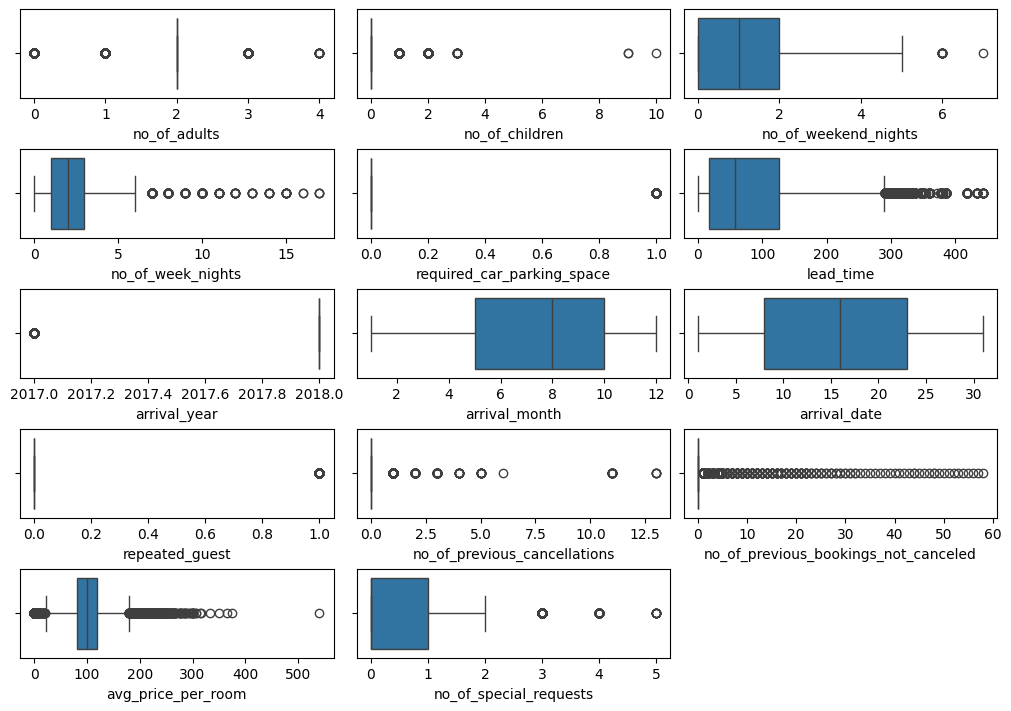

In [ ]:
show_outliers(df, display_outlier = True )

**Observation:** i have replaced the columns which are having outlier percentage less than 2. the columns(no.of_weekend_nights,no_of_week_nights,no_of_previous_cancellations)which i have replaced using winzorization technique

In [ ]:
## apply winsorization technique
num1_cols = ['no_of_weekend_nights','no_of_week_nights','no_of_previous_cancellations']
for i in num1_cols:
  q1 = df[i].quantile(0.25)
  q3 = df[i].quantile(0.75)
  iqr = q3-q1
  lower_bound = q1 - (1.5*iqr)
  upper_bound = q3 + (1.5*iqr)
  df[i] = np.where(df[i] < lower_bound, lower_bound, df[i])
  df[i] = np.where(df[i] > upper_bound, upper_bound, df[i])

================== no_of_adults =====================

Percentage of outliers 28.027567195037907
Total 10167


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
2,INN00003,1,0,2.0,1.0,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0.0,0,60.00,0,Canceled
8,INN00009,3,0,0.0,4.0,Meal Plan 1,0,Room_Type 1,121,2018,7,6,Offline,0,0.0,0,96.90,1,Not_Canceled
10,INN00011,1,0,1.0,0.0,Not Selected,0,Room_Type 1,0,2018,9,11,Online,0,0.0,0,85.03,0,Not_Canceled
11,INN00012,1,0,2.0,1.0,Meal Plan 1,0,Room_Type 4,35,2018,4,30,Online,0,0.0,0,140.40,1,Not_Canceled
13,INN00014,1,0,2.0,0.0,Meal Plan 1,0,Room_Type 1,95,2018,11,20,Online,0,0.0,0,90.00,2,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36260,INN36261,3,0,1.0,4.0,Meal Plan 1,1,Room_Type 4,178,2018,8,1,Online,0,0.0,0,137.25,1,Canceled
36261,INN36262,1,0,2.0,4.0,Meal Plan 1,0,Room_Type 1,245,2018,7,6,Offline,0,0.0,0,110.00,0,Canceled
36263,INN36264,1,0,2.0,1.0,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Online,0,0.0,0,1.00,0,Not_Canceled
36268,INN36269,1,0,0.0,3.0,Meal Plan 1,0,Room_Type 1,166,2018,11,1,Offline,0,0.0,0,110.00,0,Canceled


================== no_of_children =====================

Percentage of outliers 7.437629221226741
Total 2698


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
32,INN00033,0,2,0.0,3.0,Meal Plan 1,0,Room_Type 2,56,2018,12,7,Online,0,0.0,0,82.44,1,Not_Canceled
60,INN00061,2,2,0.0,1.0,Meal Plan 1,1,Room_Type 6,2,2018,9,2,Online,0,0.0,0,258.00,1,Not_Canceled
80,INN00081,2,2,0.0,2.0,Meal Plan 1,0,Room_Type 6,83,2018,4,1,Online,0,0.0,0,159.30,0,Canceled
95,INN00096,2,1,0.0,2.0,Meal Plan 1,1,Room_Type 1,134,2018,8,4,Online,0,0.0,0,130.50,2,Not_Canceled
99,INN00100,2,2,1.0,3.0,Meal Plan 1,0,Room_Type 6,30,2018,12,22,Online,0,0.0,0,156.90,0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36221,INN36222,2,2,2.0,4.0,Meal Plan 1,0,Room_Type 6,62,2018,9,24,Online,0,0.0,0,207.90,1,Not_Canceled
36227,INN36228,2,2,0.0,1.0,Meal Plan 1,0,Room_Type 6,20,2018,8,6,Online,0,0.0,0,231.00,1,Not_Canceled
36231,INN36232,2,1,0.0,2.0,Meal Plan 1,0,Room_Type 1,1,2018,6,28,Online,0,0.0,0,167.00,1,Not_Canceled
36249,INN36250,2,2,0.0,3.0,Meal Plan 1,0,Room_Type 6,65,2018,7,27,Online,0,0.0,0,177.30,0,Canceled


================== no_of_weekend_nights =====================

Percentage of outliers 0.0
Total 0


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


================== no_of_week_nights =====================

Percentage of outliers 0.0
Total 0


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


================== required_car_parking_space =====================

Percentage of outliers 3.09855272226051
Total 1124


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
35,INN00036,2,0,0.0,1.0,Not Selected,1,Room_Type 1,23,2018,4,27,Online,0,0.0,0,115.00,1,Not_Canceled
60,INN00061,2,2,0.0,1.0,Meal Plan 1,1,Room_Type 6,2,2018,9,2,Online,0,0.0,0,258.00,1,Not_Canceled
72,INN00073,2,0,1.0,1.0,Meal Plan 1,1,Room_Type 1,30,2018,8,29,Online,0,0.0,0,122.85,1,Not_Canceled
84,INN00085,2,0,1.0,2.0,Meal Plan 1,1,Room_Type 4,46,2018,3,4,Online,0,0.0,0,98.30,1,Not_Canceled
91,INN00092,2,0,1.0,2.0,Meal Plan 1,1,Room_Type 1,68,2018,3,18,Online,0,0.0,0,105.30,0,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36100,INN36101,2,0,0.0,2.0,Meal Plan 1,1,Room_Type 1,217,2018,5,24,Online,0,0.0,0,124.20,1,Canceled
36134,INN36135,2,0,1.0,1.0,Meal Plan 1,1,Room_Type 2,42,2017,12,28,Online,0,0.0,0,100.50,0,Not_Canceled
36177,INN36178,2,0,2.0,3.0,Meal Plan 1,1,Room_Type 1,55,2018,11,24,Online,0,0.0,0,68.07,1,Not_Canceled
36210,INN36211,3,0,1.0,2.0,Meal Plan 1,1,Room_Type 4,87,2018,8,8,Online,0,0.0,0,159.30,1,Not_Canceled


================== lead_time =====================

Percentage of outliers 3.669193659545141
Total 1331


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
5,INN00006,2,0,0.0,2.0,Meal Plan 2,0,Room_Type 1,346,2018,9,13,Online,0,0.0,0,115.0,1,Canceled
96,INN00097,2,0,0.0,2.0,Meal Plan 2,0,Room_Type 1,320,2018,8,18,Online,0,0.0,0,115.0,1,Canceled
118,INN00119,2,0,0.0,1.0,Meal Plan 1,0,Room_Type 1,443,2018,4,29,Online,0,0.0,0,65.0,0,Canceled
120,INN00121,2,0,0.0,3.0,Meal Plan 1,0,Room_Type 1,317,2018,9,1,Online,0,0.0,0,106.2,1,Canceled
170,INN00171,2,0,0.0,2.0,Meal Plan 1,0,Room_Type 1,317,2018,9,15,Online,0,0.0,0,120.0,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36139,INN36140,2,0,1.0,2.0,Meal Plan 1,0,Room_Type 1,305,2018,11,4,Offline,0,0.0,0,89.0,0,Canceled
36171,INN36172,2,0,1.0,2.0,Meal Plan 2,0,Room_Type 1,315,2018,9,30,Offline,0,0.0,0,160.0,0,Canceled
36178,INN36179,2,0,2.0,0.0,Meal Plan 2,0,Room_Type 1,386,2018,10,23,Offline,0,0.0,0,115.0,1,Canceled
36191,INN36192,2,0,0.0,3.0,Meal Plan 1,0,Room_Type 1,304,2018,11,3,Offline,0,0.0,0,89.0,0,Canceled


================== arrival_year =====================

Percentage of outliers 17.957270847691248
Total 6514


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1.0,2.0,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0.0,0,65.00,0,Not_Canceled
6,INN00007,2,0,1.0,3.0,Meal Plan 1,0,Room_Type 1,34,2017,10,15,Online,0,0.0,0,107.55,1,Not_Canceled
14,INN00015,2,0,0.0,2.0,Meal Plan 1,0,Room_Type 1,47,2017,10,20,Online,0,0.0,0,94.50,2,Not_Canceled
16,INN00017,1,0,1.0,0.0,Meal Plan 1,0,Room_Type 1,0,2017,10,5,Offline,0,0.0,0,96.00,0,Not_Canceled
17,INN00018,2,0,1.0,3.0,Not Selected,0,Room_Type 1,1,2017,8,10,Online,0,0.0,0,96.00,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36229,INN36230,3,0,0.0,3.0,Meal Plan 1,0,Room_Type 1,42,2017,11,25,Online,0,0.0,0,106.80,1,Not_Canceled
36235,INN36236,1,0,1.0,0.0,Meal Plan 1,0,Room_Type 1,3,2017,9,21,Offline,0,0.0,0,77.00,0,Not_Canceled
36242,INN36243,1,0,2.0,4.0,Meal Plan 1,0,Room_Type 1,63,2017,9,24,Offline,0,0.0,0,118.43,0,Not_Canceled
36250,INN36251,1,0,0.0,2.0,Meal Plan 2,0,Room_Type 1,6,2017,12,10,Online,0,0.0,0,0.00,0,Not_Canceled


================== arrival_month =====================

Percentage of outliers 0.0
Total 0


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


================== arrival_date =====================

Percentage of outliers 0.0
Total 0


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


================== repeated_guest =====================

Percentage of outliers 2.563749138525155
Total 930


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
88,INN00089,2,0,0.0,1.0,Not Selected,0,Room_Type 1,17,2018,12,10,Online,1,0.0,5,95.0,0,Not_Canceled
145,INN00146,1,0,0.0,2.0,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,0.0,5,0.0,1,Not_Canceled
155,INN00156,1,0,0.0,3.0,Meal Plan 1,0,Room_Type 1,4,2018,11,1,Corporate,1,0.0,5,65.0,1,Not_Canceled
266,INN00267,1,0,0.0,2.0,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0.0,1,0.0,1,Not_Canceled
288,INN00289,2,0,0.0,1.0,Meal Plan 1,0,Room_Type 2,9,2018,9,7,Complementary,1,0.0,3,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35999,INN36000,1,0,1.0,1.0,Meal Plan 1,1,Room_Type 1,3,2018,6,20,Corporate,1,0.0,8,67.0,1,Not_Canceled
36029,INN36030,1,0,0.0,3.0,Meal Plan 1,1,Room_Type 1,5,2018,9,27,Corporate,1,0.0,3,67.0,1,Not_Canceled
36079,INN36080,1,0,0.0,1.0,Not Selected,1,Room_Type 1,0,2018,1,7,Online,1,0.0,0,77.5,0,Not_Canceled
36080,INN36081,1,0,1.0,1.0,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,0.0,15,0.0,1,Not_Canceled


================== no_of_previous_cancellations =====================

Percentage of outliers 0.0
Total 0


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status


================== no_of_previous_bookings_not_canceled =====================

Percentage of outliers 2.238456237077877
Total 812


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
88,INN00089,2,0,0.0,1.0,Not Selected,0,Room_Type 1,17,2018,12,10,Online,1,0.0,5,95.0,0,Not_Canceled
145,INN00146,1,0,0.0,2.0,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,0.0,5,0.0,1,Not_Canceled
155,INN00156,1,0,0.0,3.0,Meal Plan 1,0,Room_Type 1,4,2018,11,1,Corporate,1,0.0,5,65.0,1,Not_Canceled
266,INN00267,1,0,0.0,2.0,Meal Plan 1,0,Room_Type 1,1,2017,8,12,Complementary,1,0.0,1,0.0,1,Not_Canceled
288,INN00289,2,0,0.0,1.0,Meal Plan 1,0,Room_Type 2,9,2018,9,7,Complementary,1,0.0,3,0.0,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35983,INN35984,1,0,0.0,1.0,Meal Plan 1,0,Room_Type 7,0,2018,6,7,Complementary,1,0.0,17,0.0,1,Not_Canceled
35999,INN36000,1,0,1.0,1.0,Meal Plan 1,1,Room_Type 1,3,2018,6,20,Corporate,1,0.0,8,67.0,1,Not_Canceled
36029,INN36030,1,0,0.0,3.0,Meal Plan 1,1,Room_Type 1,5,2018,9,27,Corporate,1,0.0,3,67.0,1,Not_Canceled
36080,INN36081,1,0,1.0,1.0,Meal Plan 1,0,Room_Type 7,0,2018,3,21,Complementary,1,0.0,15,0.0,1,Not_Canceled


================== avg_price_per_room =====================

Percentage of outliers 4.6753962784286704
Total 1696


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
60,INN00061,2,2,0.0,1.0,Meal Plan 1,1,Room_Type 6,2,2018,9,2,Online,0,0.0,0,258.00,1,Not_Canceled
63,INN00064,1,0,0.0,1.0,Meal Plan 1,0,Room_Type 1,2,2017,9,10,Complementary,0,0.0,0,0.00,1,Not_Canceled
114,INN00115,2,2,2.0,2.0,Meal Plan 1,0,Room_Type 2,116,2018,6,26,Online,0,0.0,0,184.24,1,Canceled
127,INN00128,2,2,0.0,2.0,Meal Plan 1,0,Room_Type 6,110,2018,10,14,Online,0,0.0,0,190.80,0,Canceled
145,INN00146,1,0,0.0,2.0,Meal Plan 1,0,Room_Type 1,13,2018,6,1,Complementary,1,0.0,5,0.00,1,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36221,INN36222,2,2,2.0,4.0,Meal Plan 1,0,Room_Type 6,62,2018,9,24,Online,0,0.0,0,207.90,1,Not_Canceled
36227,INN36228,2,2,0.0,1.0,Meal Plan 1,0,Room_Type 6,20,2018,8,6,Online,0,0.0,0,231.00,1,Not_Canceled
36250,INN36251,1,0,0.0,2.0,Meal Plan 2,0,Room_Type 1,6,2017,12,10,Online,0,0.0,0,0.00,0,Not_Canceled
36263,INN36264,1,0,2.0,1.0,Meal Plan 1,0,Room_Type 1,116,2018,2,28,Online,0,0.0,0,1.00,0,Not_Canceled


================== no_of_special_requests =====================

Percentage of outliers 2.0978635423845624
Total 761


,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
9,INN00010,2,0,0.0,5.0,Meal Plan 1,0,Room_Type 4,44,2018,10,18,Online,0,0.0,0,133.44,3,Not_Canceled
109,INN00110,2,0,2.0,1.0,Meal Plan 1,0,Room_Type 1,32,2017,9,5,Online,0,0.0,0,94.50,3,Not_Canceled
117,INN00118,2,1,2.0,5.0,Meal Plan 1,0,Room_Type 1,105,2018,11,12,Online,0,0.0,0,102.83,3,Not_Canceled
260,INN00261,3,0,1.0,1.0,Meal Plan 1,0,Room_Type 4,1,2018,6,11,Online,0,0.0,0,166.00,3,Not_Canceled
275,INN00276,3,0,2.0,4.0,Meal Plan 1,0,Room_Type 4,109,2018,7,6,Online,0,0.0,0,118.46,4,Not_Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35498,INN35499,3,0,0.0,3.0,Meal Plan 2,0,Room_Type 1,8,2017,9,1,Offline,0,0.0,0,156.50,4,Not_Canceled
35499,INN35500,2,1,0.0,3.0,Meal Plan 1,1,Room_Type 1,8,2017,9,3,Online,0,0.0,0,140.00,3,Not_Canceled
35630,INN35631,2,0,3.0,6.0,Meal Plan 1,0,Room_Type 4,351,2018,12,23,Online,0,0.0,0,85.85,3,Not_Canceled
35806,INN35807,1,0,0.0,4.0,Meal Plan 1,0,Room_Type 1,232,2018,10,19,Online,0,0.0,0,80.75,3,Not_Canceled


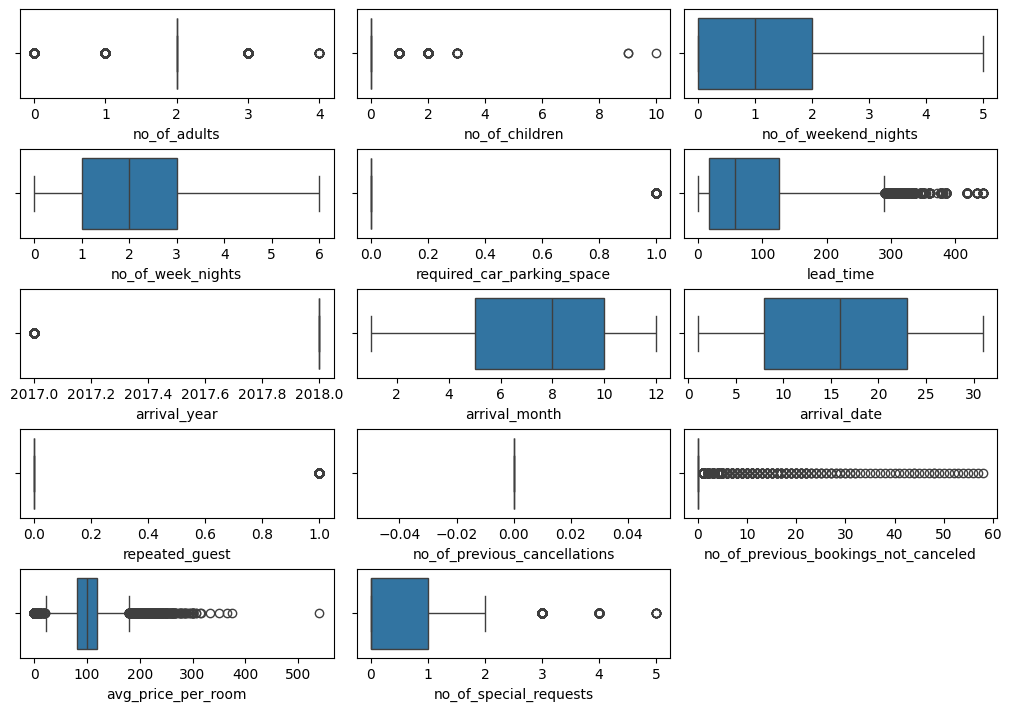

In [ ]:
show_outliers(df, display_outlier = True )

In [ ]:
cat_cols = ['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

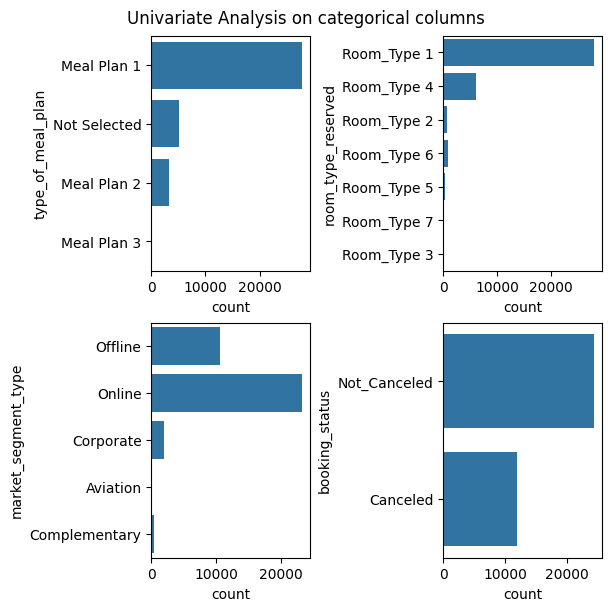

In [ ]:
plt.figure(figsize = (6,6),layout='constrained')
plt.suptitle('Univariate Analysis on categorical columns')
for i in cat_cols:
  plt.subplot(2,2,cat_cols.index(i)+1)
  sns.countplot(df[i])

**observation:** most of the people are booking hotels from online and selecting roomtype1 and meal is mealplan1

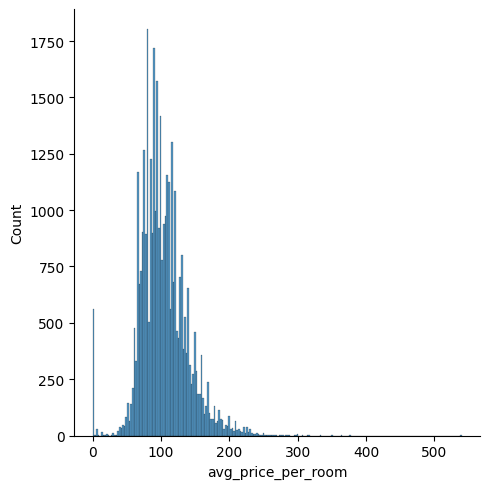

In [ ]:
sns.displot(df['avg_price_per_room'])

**BIVARIATE ANALYSIS**

for bivariate analysis i have converted int to object for understanding and visualizing the data

In [ ]:
for col in cols:
  df[col]=df[col].astype('object')

<Figure size 1000x800 with 0 Axes>

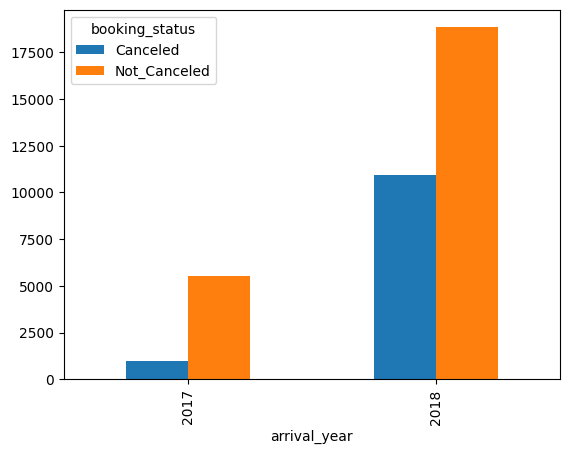

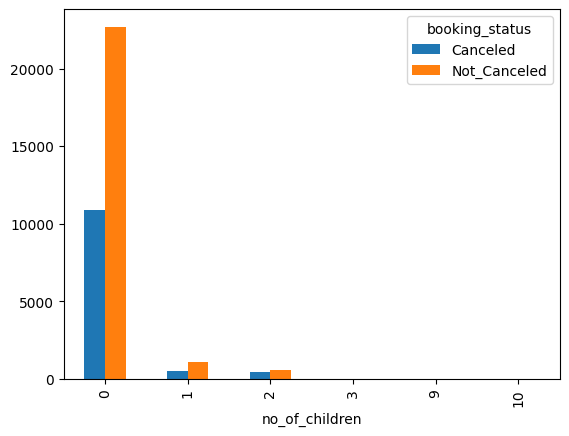

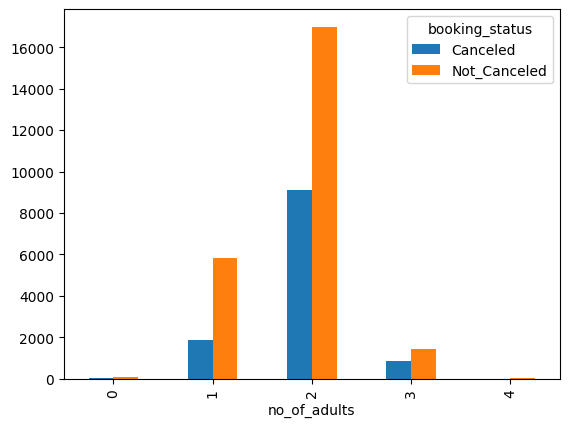

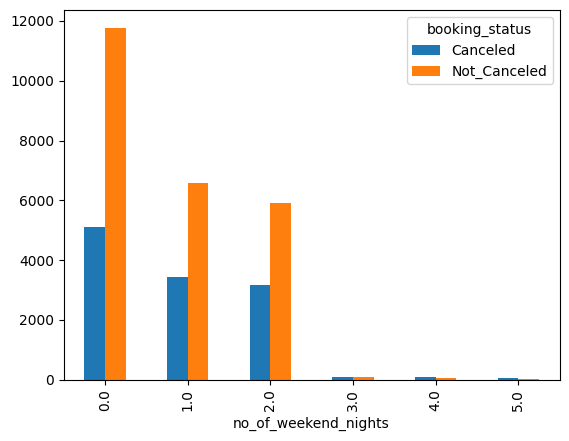

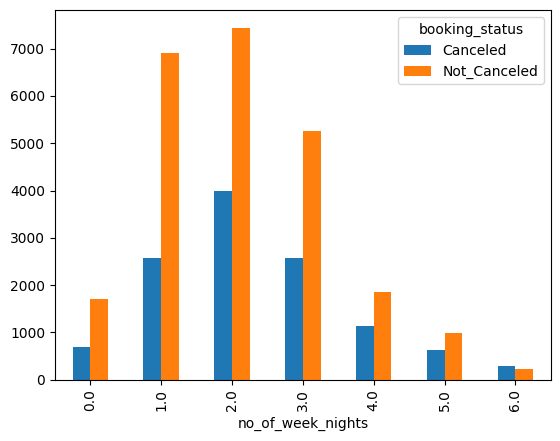

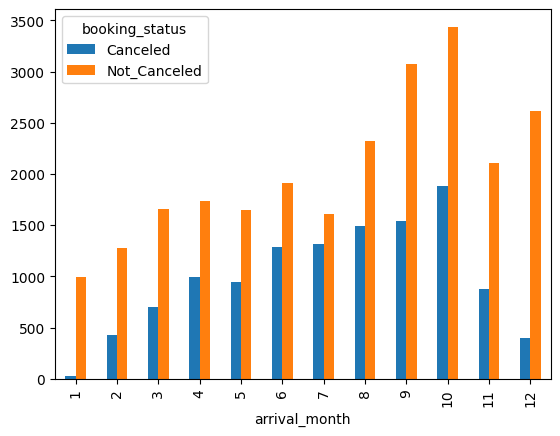

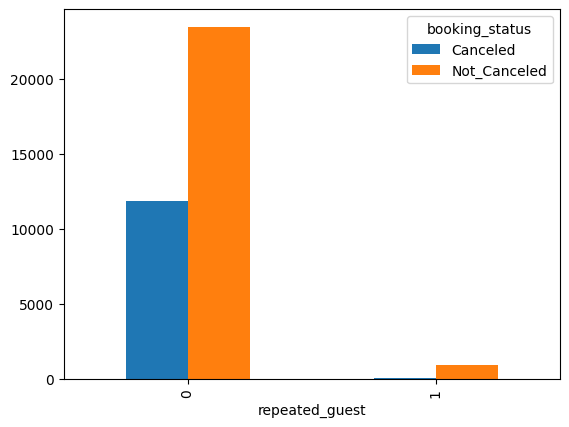

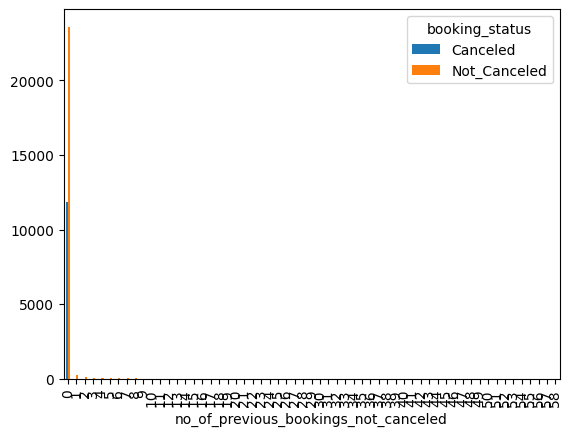

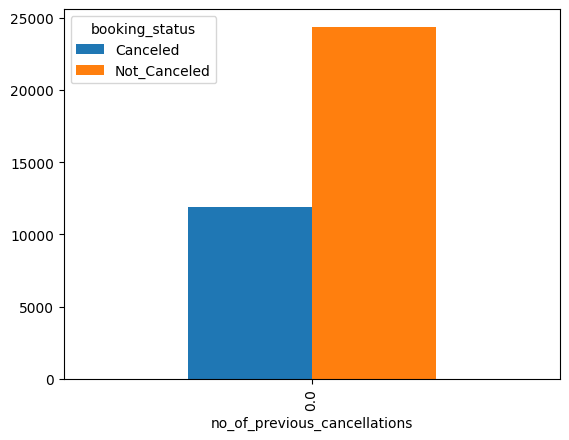

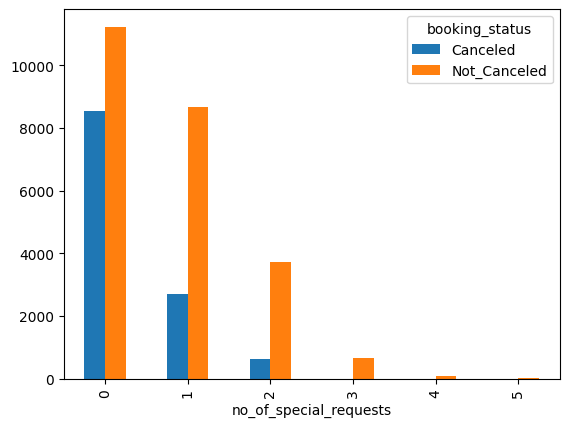

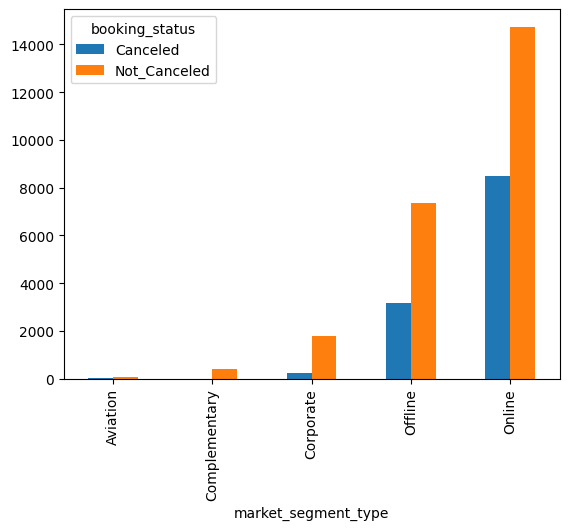

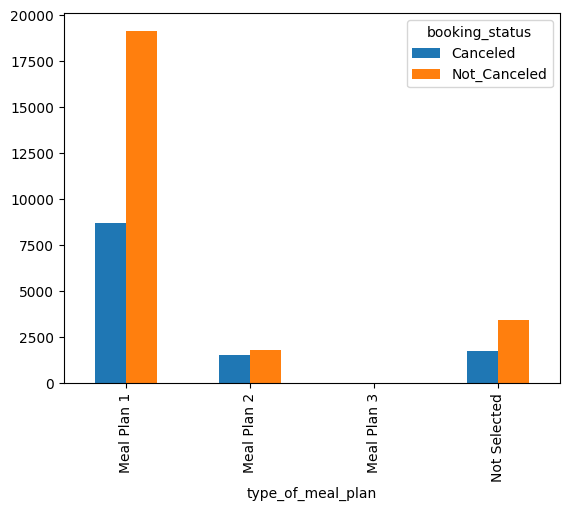

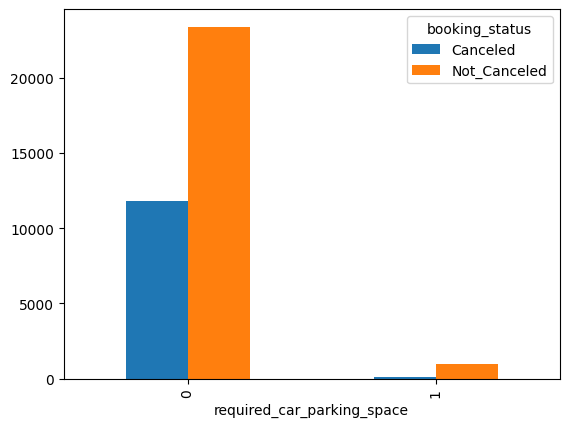

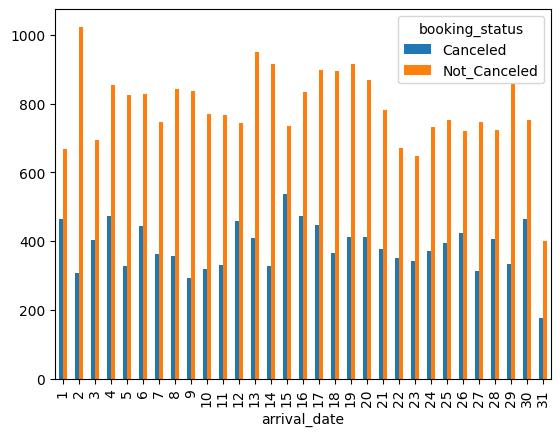

In [ ]:
plt.figure(figsize = (10,8),layout='constrained')
for col in cols:
  pd.crosstab(df[col],df['booking_status']).plot.bar()
  plt.xticks(rotation = 90)

In [ ]:
for col in cols:
  if col!='market_segment_type' and col not in ['type_of_meal_plan', 'room_type_reserved']: # exclude these columns that does not contain numeric values.
    df[col] = df[col].astype('int')

In [ ]:
df.dtypes

,0
Booking_ID,object
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,object
required_car_parking_space,int64
room_type_reserved,object
lead_time,int64
arrival_year,int64


In [ ]:
df1=pd.DataFrame()
for i in df.columns:
  if i =='no_of_previous_cancellations':
    continue
  else:
    df1[i]=df[i]

**MULTIVARIATE ANALYSIS**

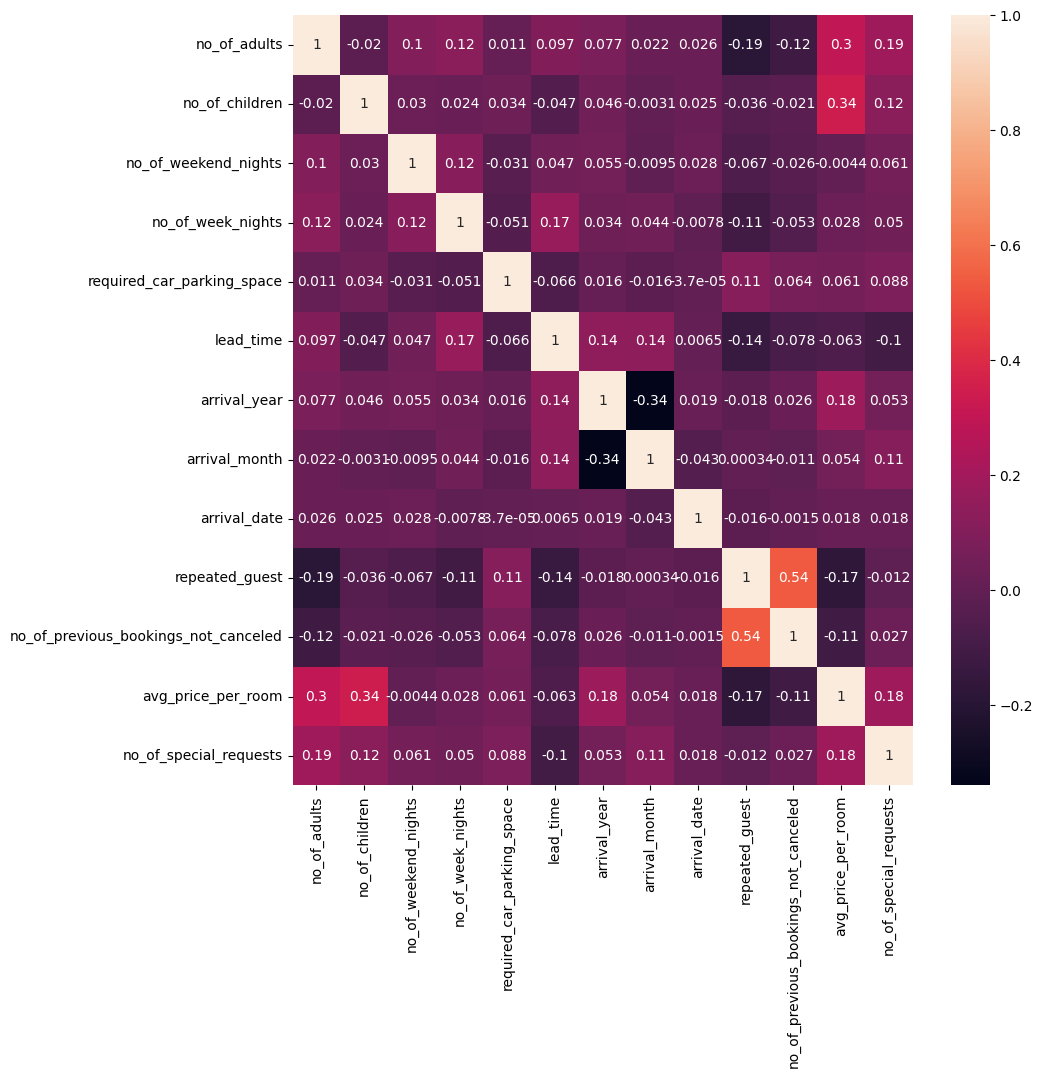

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 10))
sns.heatmap(df1.select_dtypes(include=['int', 'float']).corr(), annot=True)
plt.show()
## save the plot
plt.savefig('heatmap.png')

**HYPOTHESIS TESTING**

In [ ]:
from scipy.stats import chi2_contingency
def chi_square_test(x,list,target,cols_to_exclude):
    for col in cat_cols:
        if col!= 'booking_status':
            # Create contingency table
            contingency_table = pd.crosstab(x[col], x[target])
            # Perform Chi-Square test
            chi2, p, dof, expected = chi2_contingency(contingency_table)

            print(f"Chi-Square Statistic for {col}: {chi2}")
            print(f"P-value for {col}: {p}")
            print(f"Degrees of Freedom for {col}: {dof}")
            print(f"Expected Frequencies for {col}: ")
            print(expected)
            if p < 0.05:
                print("Reject the null hypothesis: There is a relationship between the variables.")
            else:
                cols_to_exclude.append(col)
                print("Fail to reject the null hypothesis: No significant relationship between the variables.")

    print('-'*100)
    return cols_to_exclude

In [ ]:
cols_to_exclude=[]
results=chi_square_test(df,cat_cols,'booking_status',cols_to_exclude)
results

Chi-Square Statistic for type_of_meal_plan: 278.29490920586017
P-value for type_of_meal_plan: 4.951915406087789e-60
Degrees of Freedom for type_of_meal_plan: 3
Expected Frequencies for type_of_meal_plan: 
[[9.11975121e+03 1.87152488e+04]
 [1.08283735e+03 2.22216265e+03]
 [1.63818057e+00 3.36181943e+00]
 [1.68077326e+03 3.44922674e+03]]
Reject the null hypothesis: There is a relationship between the variables.
Chi-Square Statistic for room_type_reserved: 57.33495179790707
P-value for room_type_reserved: 1.5627796772447482e-10
Degrees of Freedom for room_type_reserved: 6
Expected Frequencies for room_type_reserved: 
[[9.21640386e+03 1.89135961e+04]
 [2.26724190e+02 4.65275810e+02]
 [2.29345279e+00 4.70654721e+00]
 [1.98449194e+03 4.07250806e+03]
 [8.68235700e+01 1.78176430e+02]
 [3.16496485e+02 6.49503515e+02]
 [5.17665059e+01 1.06233494e+02]]
Reject the null hypothesis: There is a relationship between the variables.
Chi-Square Statistic for market_segment_type: 814.108865240557
P-value 

[]

In [ ]:
cols_to_exclude

[]

In [ ]:
df.dtypes

,0
Booking_ID,object
no_of_adults,int64
no_of_children,int64
no_of_weekend_nights,int64
no_of_week_nights,int64
type_of_meal_plan,object
required_car_parking_space,int64
room_type_reserved,object
lead_time,int64
arrival_year,int64


In [ ]:
num_cols=['no_of_adults','no_of_children','no_of_weekend_nights','no_of_week_nights','required_car_parking_space','lead_time','arrival_year','arrival_month','arrival_date','repeated_guest','no_of_previous_cancellations','no_of_previous_bookings_not_canceled','no_of_special_requests']

In [ ]:
def annova_test(x, num_cols, target, num_cols_to_exclude=[]):
    from scipy.stats import f_oneway
    for col in num_cols:
        groups = []
        for value in x[target].unique():
            groups.append(x[x[target] == value][col])


        f_stat, p_value = f_oneway(*groups)
        print(f"ANOVA test for {col}:")
        print("F-Statistic:", f_stat)
        print("P-value:", p_value)


        if p_value < 0.05:
            print("Reject the null hypothesis: There is a significant difference in means.")
        else:
            num_cols_to_exclude.append(col)
            print("Fail to reject the null hypothesis: No significant difference in means.")
        print("-" * 20)
    return num_cols_to_exclude

In [ ]:
num_cols_to_exclude=[]
annova_test(df,num_cols,'booking_status',num_cols_to_exclude)

ANOVA test for no_of_adults:
F-Statistic: 276.13376741192224
P-value: 8.84833825779786e-62
Reject the null hypothesis: There is a significant difference in means.
--------------------
ANOVA test for no_of_children:
F-Statistic: 39.7312930232164
P-value: 2.947637376831079e-10
Reject the null hypothesis: There is a significant difference in means.
--------------------
ANOVA test for no_of_weekend_nights:
F-Statistic: 135.77160160781176
P-value: 2.545735516342796e-31
Reject the null hypothesis: There is a significant difference in means.
--------------------
ANOVA test for no_of_week_nights:
F-Statistic: 263.03380158323307
P-value: 6.038053033556469e-59
Reject the null hypothesis: There is a significant difference in means.
--------------------
ANOVA test for required_car_parking_space:
F-Statistic: 271.4485813314304
P-value: 9.125921510737052e-61
Reject the null hypothesis: There is a significant difference in means.
--------------------
ANOVA test for lead_time:
F-Statistic: 8636.863035

/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:531: ConstantInputWarning: Each of the input arrays is constant; the F statistic is not defined or infinite
  res = hypotest_fun_out(*samples, **kwds)


['no_of_previous_cancellations']

In [ ]:
### droping  the booking_id column as it will not help in building the predicting  model
df.drop('Booking_ID',axis=1,inplace=True)

In [ ]:
df.drop('no_of_previous_cancellations',axis=1,inplace=True)

In [ ]:
df['market_segment_type'].value_counts()

,count
market_segment_type,
Online,23214
Offline,10528
Corporate,2017
Complementary,391
Aviation,125


In [ ]:
df['type_of_meal_plan'].value_counts()

,count
type_of_meal_plan,
Meal Plan 1,27835
Not Selected,5130
Meal Plan 2,3305
Meal Plan 3,5


In [ ]:
df['room_type_reserved'].value_counts()

,count
room_type_reserved,
Room_Type 1,28130
Room_Type 4,6057
Room_Type 6,966
Room_Type 2,692
Room_Type 5,265
Room_Type 7,158
Room_Type 3,7


In [ ]:
df['booking_status'] = df['booking_status'].map({'Canceled':0,'Not_Canceled':1})

**Observation:** I have used label encoding because these categorical columns are dependent on target variable. Also i have used one hot encoding but i am not able to get good model performance.

In [ ]:
### encoding the categorical variables
cols=['type_of_meal_plan','room_type_reserved','market_segment_type']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cols:
  df[i] = le.fit_transform(df[i])

In [ ]:
df.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,0,1,2,0,0,0,224,2017,10,2,3,0,0,65.00,0,1
1,2,0,2,3,3,0,0,5,2018,11,6,4,0,0,106.68,1,1
2,1,0,2,1,0,0,0,1,2018,2,28,4,0,0,60.00,0,0
3,2,0,0,2,0,0,0,211,2018,5,20,4,0,0,100.00,0,0
4,2,0,1,1,3,0,0,48,2018,4,11,4,0,0,94.50,0,0


In [ ]:
df.shape

(36275, 17)

In [ ]:
x = df.drop('booking_status', axis=1)
y = df['booking_status']


**observation:** for scaling i have used robust scaling because most of the columns in the dataset are not normally distributed and also they are having more than 10% of outliers and robust handles outliers well.
the formula for robust scaling is X(scaled)=x-median(x)/IQR(x)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
cols=x.columns
rc = RobustScaler()
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train = pd.DataFrame(rc.fit_transform(x_train),columns=cols)
x_test = pd.DataFrame(rc.transform(x_test),columns=cols)

**Observation:** i have used smote for imbalanced data

In [ ]:
## making imbalaned data to balanced data
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x_train,y_train = smote.fit_resample(x_train,y_train)

**model building using ml algo**

**Logistic regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
lr = LogisticRegression()
lr.fit(x_train,y_train)
y_train_pred=lr.predict(x_train)
print('train data accuracy:',accuracy_score(y_train,y_train_pred))
print('-'*50)
print(classification_report(y_train,y_train_pred))
y_pred=lr.predict(x_test)
print('test data accuracy:',accuracy_score(y_test,y_pred))
print('-'*50)
print(classification_report(y_test,y_pred))

LogisticRegression()

**Decisiontree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
y_train_pred=dt.predict(x_train)
print('train data accuracy:',accuracy_score(y_train,y_train_pred))
print('-'*50)
print(classification_report(y_train,y_train_pred))
y_pred=lr.predict(x_test)
print('test data accuracy:',accuracy_score(y_test,y_pred))
print('-'*50)
print(classification_report(y_test,y_pred))

train data accuracy: 0.9948595979745282
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     19551
           1       0.99      0.99      0.99     19551

    accuracy                           0.99     39102
   macro avg       0.99      0.99      0.99     39102
weighted avg       0.99      0.99      0.99     39102

test data accuracy: 0.7816678152997932
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.64      0.77      0.70      2416
           1       0.87      0.79      0.83      4839

    accuracy                           0.78      7255
   macro avg       0.76      0.78      0.76      7255
weighted avg       0.80      0.78      0.79      7255



**Randomforest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
y_train_pred=rf.predict(x_train)
print('train data accuracy:',accuracy_score(y_train,y_train_pred))
print('-'*50)
print(classification_report(y_train,y_train_pred))
y_pred=rf.predict(x_test)
print('test data accuracy:',accuracy_score(y_test,y_pred))
print('-'*50)
print(classification_report(y_test,y_pred))

train data accuracy: 0.9948595979745282
--------------------------------------------------
              precision    recall  f1-score   support

           0       1.00      0.99      0.99     19551
           1       0.99      1.00      0.99     19551

    accuracy                           0.99     39102
   macro avg       0.99      0.99      0.99     39102
weighted avg       0.99      0.99      0.99     39102

test data accuracy: 0.9042039972432805
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      2416
           1       0.92      0.93      0.93      4839

    accuracy                           0.90      7255
   macro avg       0.89      0.89      0.89      7255
weighted avg       0.90      0.90      0.90      7255



**GBMclassifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbm = GradientBoostingClassifier()
gbm.fit(x_train,y_train)
y_train_pred=gbm.predict(x_train)
print('train data accuracy:',accuracy_score(y_train,y_train_pred))
print('-'*50)
print(classification_report(y_train,y_train_pred))
y_pred=gbm.predict(x_test)
print('test data accuracy:',accuracy_score(y_test,y_pred))
print('-'*50)
print(classification_report(y_test,y_pred))

train data accuracy: 0.8416705027875812
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.82      0.84     19551
           1       0.83      0.86      0.84     19551

    accuracy                           0.84     39102
   macro avg       0.84      0.84      0.84     39102
weighted avg       0.84      0.84      0.84     39102

test data accuracy: 0.836526533425224
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.74      0.78      0.76      2416
           1       0.89      0.86      0.88      4839

    accuracy                           0.84      7255
   macro avg       0.81      0.82      0.82      7255
weighted avg       0.84      0.84      0.84      7255



**XGBOOST classifier**

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
y_train_pred=xgb.predict(x_train)
print('train data accuracy:',accuracy_score(y_train,y_train_pred))
print('-'*50)
print(classification_report(y_train,y_train_pred))
y_pred=xgb.predict(x_test)
print('test data accuracy:',accuracy_score(y_test,y_pred))
print('-'*50)
print(classification_report(y_test,y_pred))

train data accuracy: 0.9317681960002046
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.92      0.93     19551
           1       0.92      0.94      0.93     19551

    accuracy                           0.93     39102
   macro avg       0.93      0.93      0.93     39102
weighted avg       0.93      0.93      0.93     39102

test data accuracy: 0.8865609924190213
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      2416
           1       0.91      0.92      0.92      4839

    accuracy                           0.89      7255
   macro avg       0.87      0.87      0.87      7255
weighted avg       0.89      0.89      0.89      7255



**Model building using ANN**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
nn = Sequential()
nn.add(Input(shape=(x_train.shape[1],)))
nn.add(Dense(256,activation='relu'))
nn.add(Dropout(0.3))
nn.add(Dense(256,activation='relu'))
nn.add(Dropout(0.3))
nn.add(Dense(256,activation='relu'))
nn.add(Dropout(0.3))
nn.add(Dense(1,activation='sigmoid'))

In [ ]:
nn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │           4,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 136,193 (532.00 KB)

 Trainable params: 136,193 (532.00 KB)

 Non-trainable params: 0 (0.00 B)

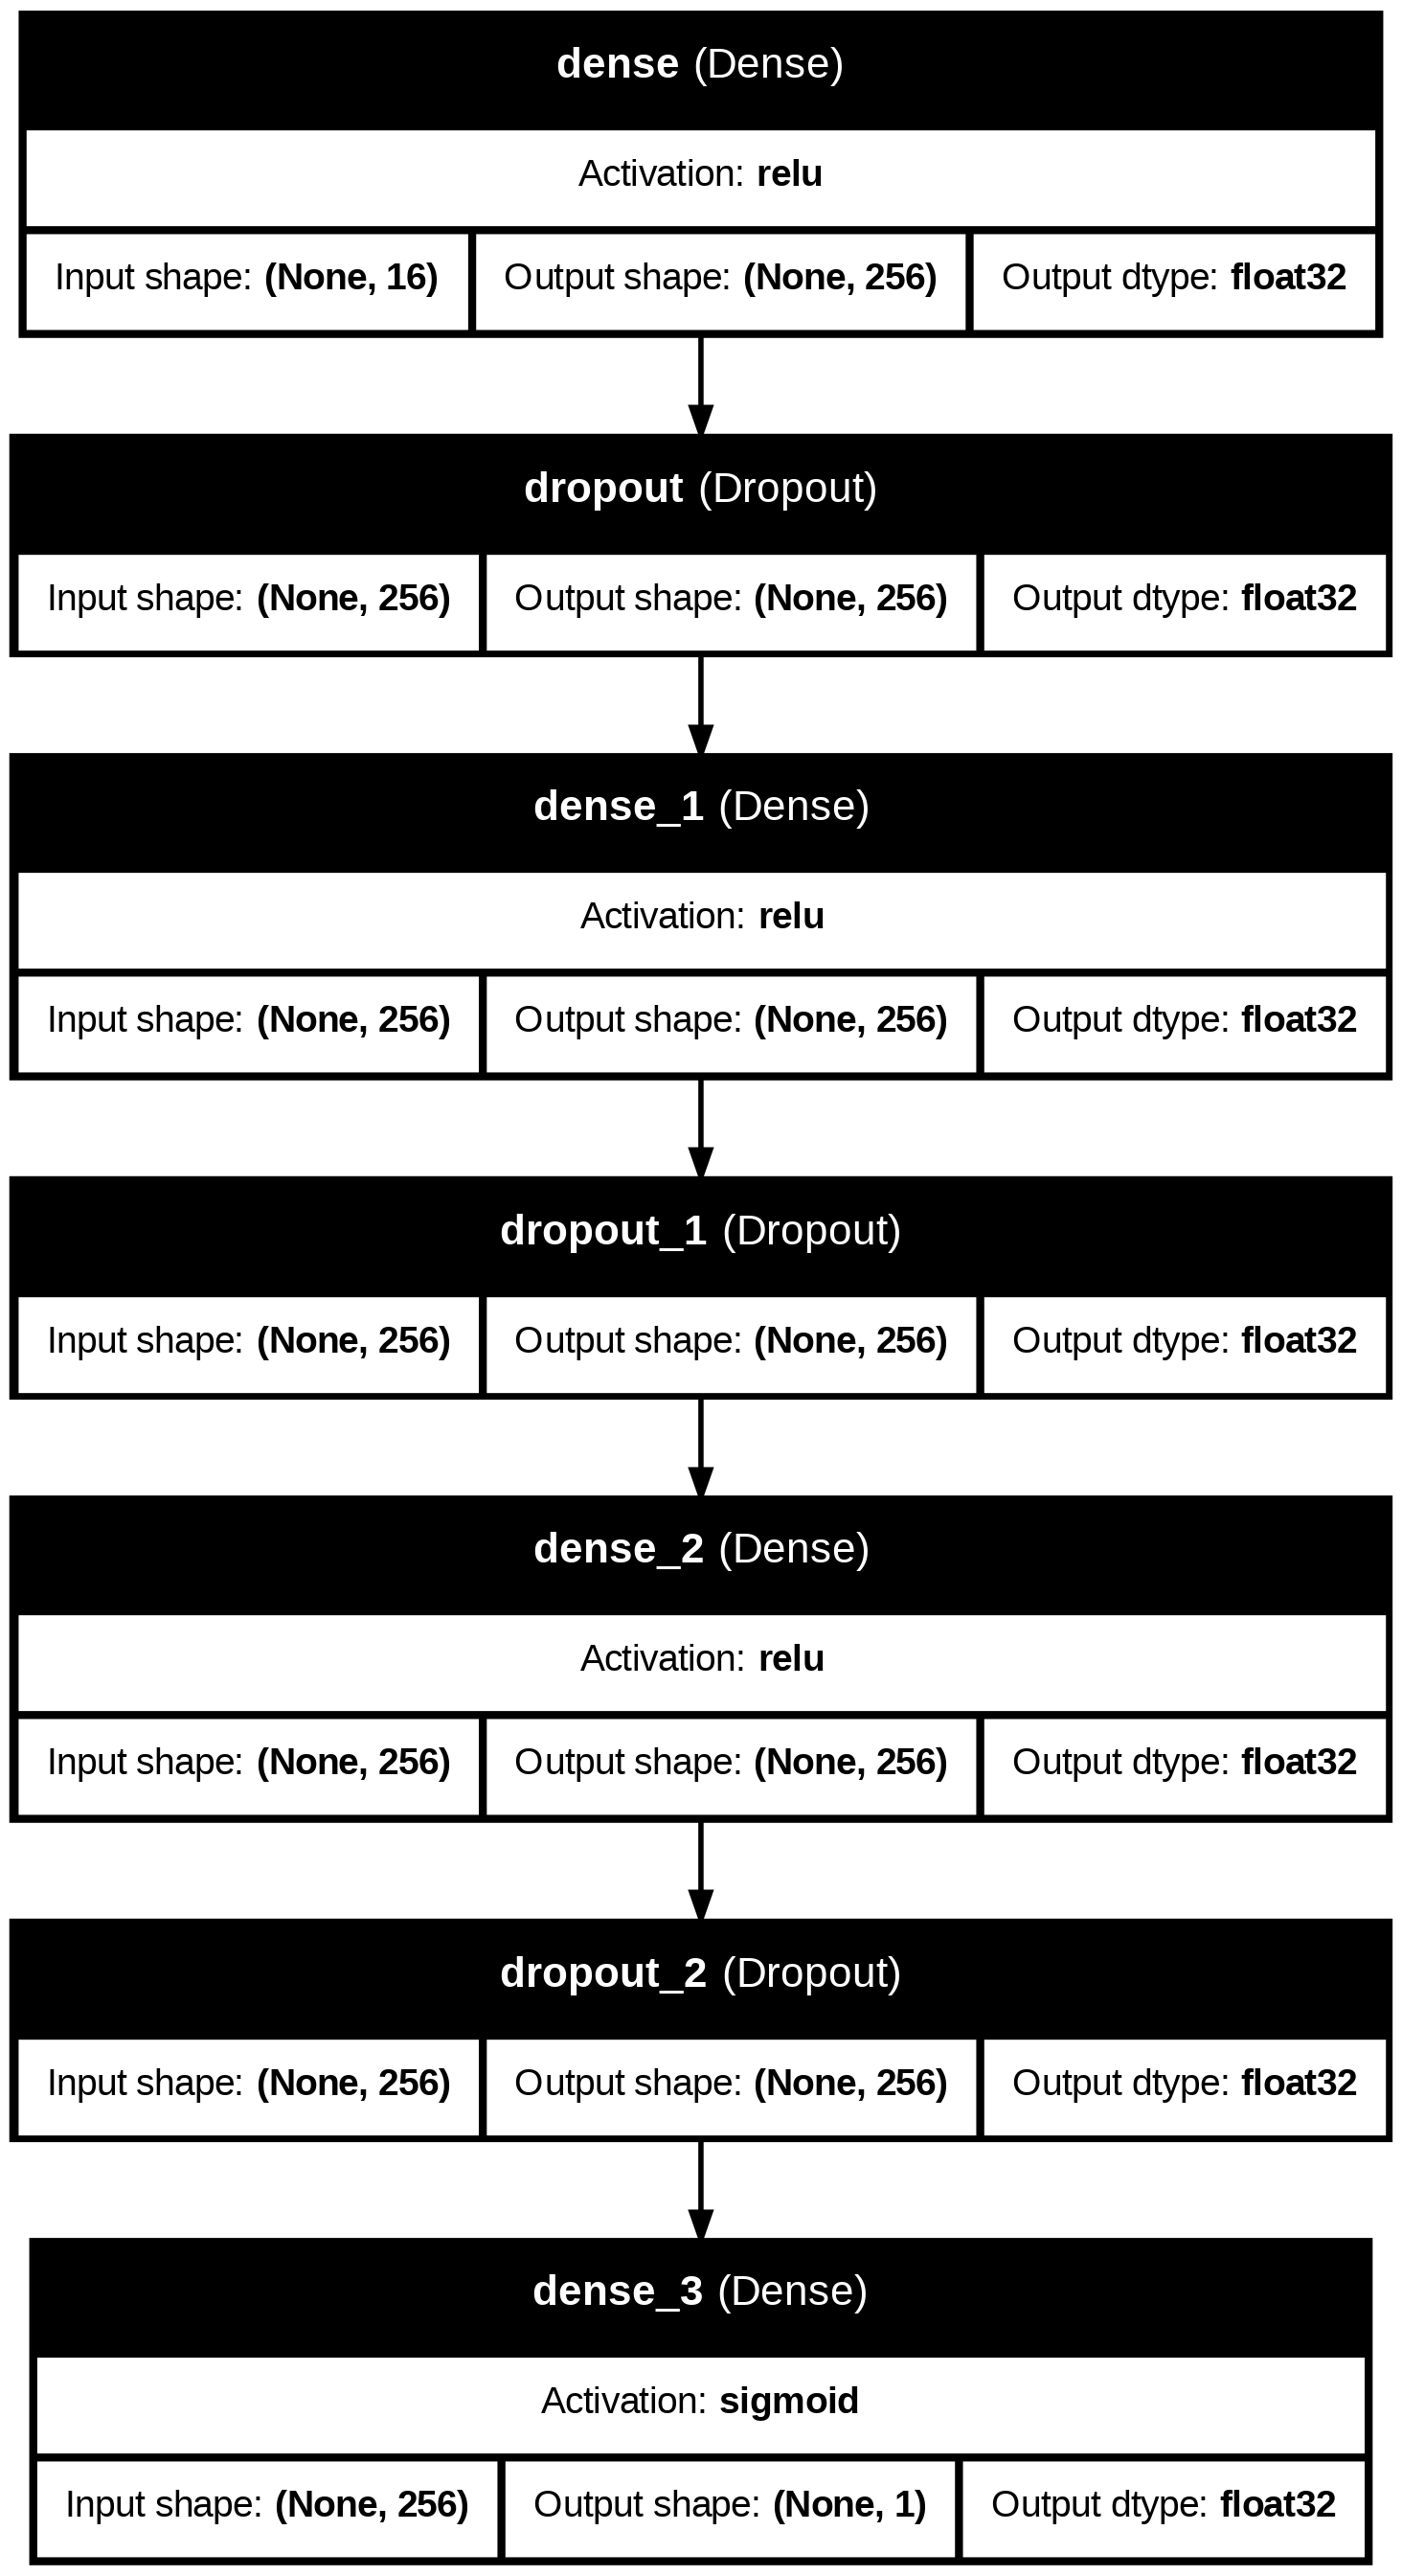

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(nn,
           show_shapes =  True,
       show_layer_names = True,
          show_dtype = True,show_layer_activations = True, expand_nested  = True )

In [ ]:
nn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
es = EarlyStopping(monitor='val_accuracy',patience=10,mode='max',restore_best_weights=True)

In [ ]:
train_log = nn.fit(x_train,y_train,epochs=100,validation_split=0.2,callbacks=[es],batch_size=128)

Epoch 1/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - accuracy: 0.7524 - loss: 0.5001 - val_accuracy: 0.6538 - val_loss: 0.6214
Epoch 2/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8109 - loss: 0.4201 - val_accuracy: 0.7361 - val_loss: 0.5088
Epoch 3/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8209 - loss: 0.3924 - val_accuracy: 0.7571 - val_loss: 0.4840
Epoch 4/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8279 - loss: 0.3832 - val_accuracy: 0.7716 - val_loss: 0.4516
Epoch 5/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8349 - loss: 0.3709 - val_accuracy: 0.7794 - val_loss: 0.4665
Epoch 6/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8344 - loss: 0.3683 - val_accuracy: 0.7752 - val_loss: 0.4475
Epoch 7/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.8402 - loss: 0.3581 - val_accuracy: 0.7987 - val_loss: 0.4172
Epoch 8/100
245/245 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8456 - loss: 0.3529 - val_a

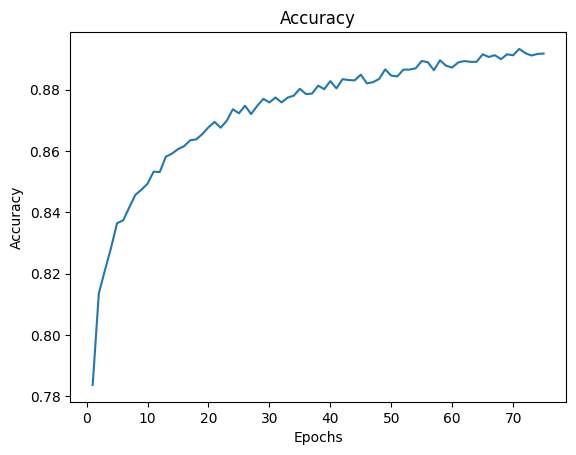

In [ ]:
accuracy_list = train_log.history["accuracy"]
epochs = list(range(1,len(accuracy_list)+1))
plt.plot(epochs, accuracy_list)
plt.title("Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()

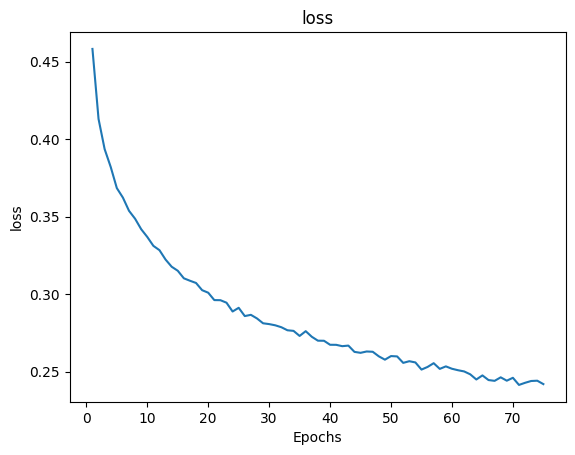

In [ ]:
loss_list = train_log.history["loss"]
plt.plot(epochs, loss_list)
plt.title("loss")
plt.xlabel("Epochs")
plt.ylabel("loss")
plt.show()

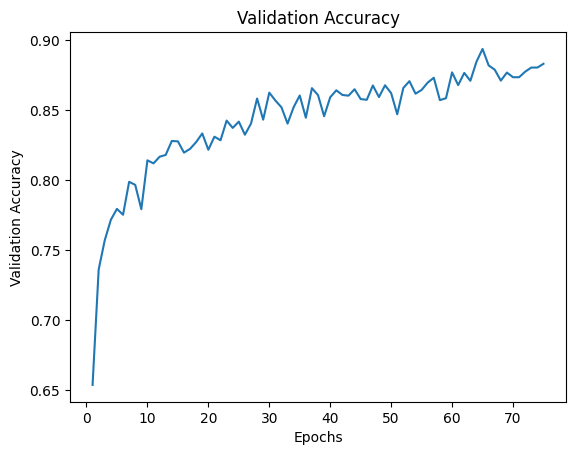

In [ ]:
val_accuracy_list = train_log.history["val_accuracy"]
plt.plot(epochs, val_accuracy_list)
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Validation Accuracy")
plt.show()

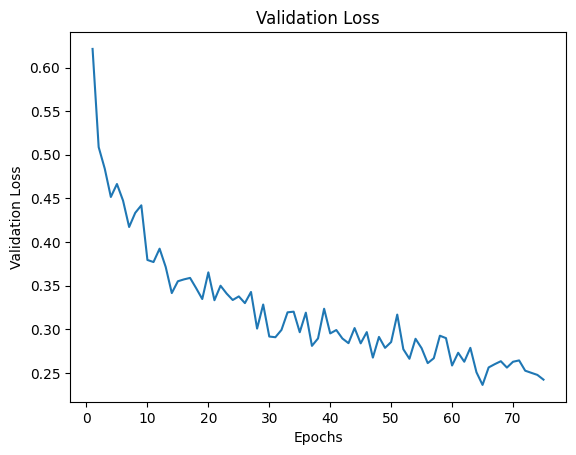

In [ ]:
val_loss = train_log.history["val_loss"]
plt.plot(epochs, val_loss)
plt.title("Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Validation Loss")
plt.show()

In [ ]:
y_pred  = nn.predict(x_test)

227/227 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [ ]:
y_pred = np.where(y_pred > 0.5, 1, 0)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report
print("Test Data Accuracy: ", accuracy_score(y_test, y_pred))
print('-'*50)
print(classification_report(y_test, y_pred))

Test Data Accuracy:  0.87829083390765
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.82      0.82      0.82      2416
           1       0.91      0.91      0.91      4839

    accuracy                           0.88      7255
   macro avg       0.86      0.86      0.86      7255
weighted avg       0.88      0.88      0.88      7255



### Conclusion: 
This project successfully demonstrates how machine learning and deep learning models can be used to predict hotel reservation cancellations. By analyzing customer booking behavior and key influencing factors, we developed predictive models that achieved high accuracy in forecasting cancellations.